#YOLOv8 GÖRÜNTÜ BÖLÜTLEME

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YOLOv8/3_image_segmentation

/content/drive/MyDrive/YOLOv8/3_image_segmentation


In [ ]:
%pwd


'/content/drive/MyDrive/YOLOv8/3_image_segmentation'

In [ ]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


#TEST/PREDİCTİON

In [ ]:
!yolo segment predict model=yolov8n-seg.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.74M/6.74M [00:00<00:00, 58.8MB/s]
Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,404,320 parameters, 0 gradients, 12.6 GFLOPs

100% 134k/134k [00:00<00:00, 5.50MB/s]
image 1/1 /content/drive/MyDrive/YOLOv8/3_image_segmentation/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 698.3ms
Speed: 21.8ms preprocess, 698.3ms inference, 75.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


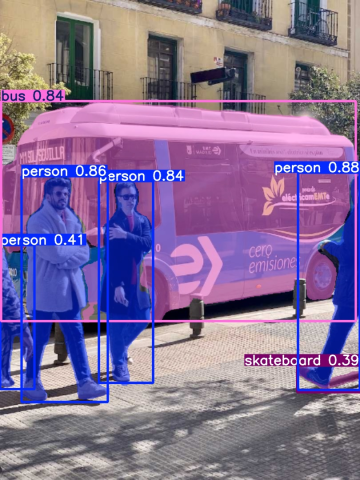

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path = "/content/drive/MyDrive/YOLOv8/3_image_segmentation/runs/segment/predict/bus.jpg"

img = cv2.imread(img_path)
img = imutils.resize(img, width=360)
cv2_imshow(img)


#PYTHON İLE VERİLERE ERİŞME


0: 640x480 3 persons, 1 bus, 525.5ms
Speed: 5.4ms preprocess, 525.5ms inference, 21.4ms postprocess per image at shape (1, 3, 640, 480)


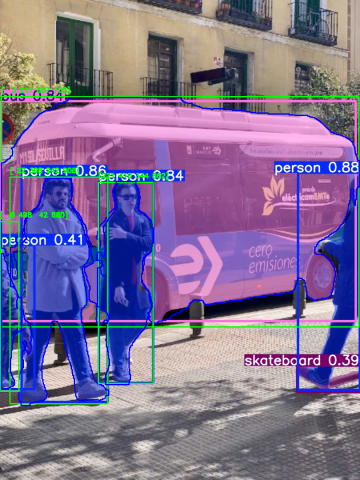

In [ ]:
import cv2
import imutils
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

imgpath = "bus.jpg"
model_path = "yolov8n-seg.pt"
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(img_path)
model = YOLO(model_path)


def extract_data(img, model):
  h, w, ch= img.shape
  results = model.predict(source=img.copy(), save=False, save_txt=False)
  result = results[0]
  seg_contour_idx = []

  for seg in result.masks.xyn:
    seg[:,0] = seg[:,0] * w
    seg[:,1] = seg[:,1] * h
    segment = np.array(seg, dtype=np.int32)
    seg_contour_idx.append(segment)

  bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
  class_ids = np.array(result.boxes.xyxy.cpu(), dtype="int")
  scores = np.array(result.boxes.conf.cpu(), dtype="float")

  return bboxes, class_ids, seg_contour_idx, scores

bboxes, class_ids, seg_contour_idx, scores = extract_data(img,model)



for box,class_id,segmentation_id,score in zip(bboxes, class_ids, seg_contour_idx, scores):
  (xmin, ymin, xmax, ymax) = box

  cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (0,255,0), 2)
  cv2.polylines(img, [segmentation_id], True, (255,0,0), 2)
  cv2.putText(img , str(class_id), (xmin,ymin-10), font, 0.5 , (0,255,0), 2)

img = imutils.resize(img, width=360)
cv2_imshow(img)

#EĞİTİM // TRAİNİNG

In [ ]:
!unzip data/car_part_dataset.zip -d data

Archive:  data/car_part_dataset.zip
   creating: data/car_part_dataset/images/
   creating: data/car_part_dataset/images/test/
  inflating: data/car_part_dataset/images/test/1003.jpg  
  inflating: data/car_part_dataset/images/test/1008.jpg  
  inflating: data/car_part_dataset/images/test/1009.jpg  
  inflating: data/car_part_dataset/images/test/1012.jpg  
  inflating: data/car_part_dataset/images/test/1015.jpg  
  inflating: data/car_part_dataset/images/test/1022.jpg  
  inflating: data/car_part_dataset/images/test/1034.jpg  
  inflating: data/car_part_dataset/images/test/1036.jpg  
  inflating: data/car_part_dataset/images/test/1037.jpg  
  inflating: data/car_part_dataset/images/test/1049.jpg  
  inflating: data/car_part_dataset/images/test/105.jpg  
  inflating: data/car_part_dataset/images/test/1062.jpg  
  inflating: data/car_part_dataset/images/test/1066.jpg  
  inflating: data/car_part_dataset/images/test/1071.jpg  
  inflating: data/car_part_dataset/images/test/1083.jpg  
  in

In [ ]:
!yolo segment train data=/content/drive/MyDrive/YOLOv8/3_image_segmentation/data/config.yaml model=yolov8n-seg.pt epochs=20 imgsz=640 workers=8 batch=8 device=0 name=yolov8_car_part_segmentation

Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/YOLOv8/3_image_segmentation/data/config.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_car_part_segmentation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

# TEST // PREDİCT

In [ ]:
!yolo segment predict model=/content/drive/MyDrive/YOLOv8/3_image_segmentation/runs/segment/yolov8_car_part_segmentation/weights/best.pt source='/content/drive/MyDrive/YOLOv8/3_image_segmentation/data/car_part_dataset/images/test' save=True

Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,819 parameters, 0 gradients, 12.0 GFLOPs

image 1/176 /content/drive/MyDrive/YOLOv8/3_image_segmentation/data/car_part_dataset/images/test/1003.jpg: 640x640 1 back_bumper, 1 back_glass, 2 back_lights, 12.5ms
image 2/176 /content/drive/MyDrive/YOLOv8/3_image_segmentation/data/car_part_dataset/images/test/1008.jpg: 640x640 1 front_bumper, 1 front_glass, 2 front_lights, 1 hood, 20.6ms
image 3/176 /content/drive/MyDrive/YOLOv8/3_image_segmentation/data/car_part_dataset/images/test/1009.jpg: 640x640 1 back_bumper, 1 back_door, 1 back_glass, 1 back_light, 1 front_door, 9.4ms
image 4/176 /content/drive/MyDrive/YOLOv8/3_image_segmentation/data/car_part_dataset/images/test/1012.jpg: 640x640 1 back_bumper, 1 back_glass, 2 back_lights, 9.4ms
image 5/176 /content/drive/MyDrive/YOLOv8/3_image_segmentation/data/car_part_dataset/images/test/1015.jpg: 640x640 1 back_bum


0: 448x640 1 front_bumper, 1 front_door, 1 front_glass, 3 front_lights, 1 hood, 27.3ms
Speed: 2.5ms preprocess, 27.3ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)
class_id: 8, type: <class 'numpy.int64'>, shape: ()
class_id: 6, type: <class 'numpy.int64'>, shape: ()
class_id: 7, type: <class 'numpy.int64'>, shape: ()
class_id: 4, type: <class 'numpy.int64'>, shape: ()
class_id: 5, type: <class 'numpy.int64'>, shape: ()
class_id: 7, type: <class 'numpy.int64'>, shape: ()
class_id: 7, type: <class 'numpy.int64'>, shape: ()


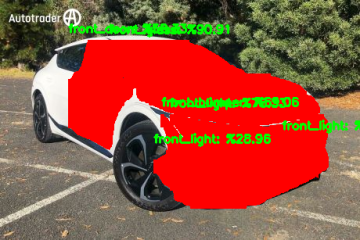

In [38]:
import cv2
import imutils
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

img_path = "/content/drive/MyDrive/YOLOv8/3_image_segmentation/inference/test.jpg"
model_path = "/content/drive/MyDrive/YOLOv8/3_image_segmentation/runs/segment/yolov8_car_part_segmentation/weights/best.pt"
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(img_path)
model = YOLO(model_path)

def extract_data(img, model):
    h, w, ch = img.shape
    results = model.predict(source=img.copy(), save=False, save_txt=False)
    result = results[0]
    seg_contour_idx = []

    for seg in result.masks.xyn:
        seg[:, 0] = seg[:, 0] * w
        seg[:, 1] = seg[:, 1] * h
        segment = np.array(seg, dtype=np.int32)
        seg_contour_idx.append(segment)

    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    class_ids = np.array(result.boxes.cls.cpu(), dtype="int")
    scores = np.array(result.boxes.conf.cpu(), dtype="float")
    class_names = result.names

    return bboxes, class_ids, seg_contour_idx, scores, class_names

bboxes, class_ids, seg_contour_idx, scores, class_names = extract_data(img, model)

for box, class_id, segmentation_id, score in zip(bboxes, class_ids, seg_contour_idx, scores):
    (xmin, ymin, xmax, ymax) = box

    #cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    #cv2.polylines(img, [segmentation_id], True, (255, 0, 0), 2)
    cv2.fillPoly(img, pts=[segmentation_id], color=(0, 0, 255))

    print(f"class_id: {class_id}, type: {type(class_id)}, shape: {class_id.shape}")
    class_name = class_names[class_id.item()]
    score = score * 100
    text = f"{class_name}: %{score:.2f}"

    cv2.putText(img, text, (xmin, ymin - 10), font, 0.5, (0, 255, 0), 2)

img = imutils.resize(img, width=360)
cv2_imshow(img)
